<a href="https://colab.research.google.com/github/SEKAR147/SK_Pytorch_Workpace/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in Pytorch

* [`torchvision`] - base domain library for Pytorch computer vision
* [`torchvision.datasets`] - get datasets and data loading for compputer vision here
* [`torchvision.models`] - get pretrained cv models that you can leverage for your own peoblems
* [`torchvision.transforms`] - functions for manipulating your vision data(images)to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for Pytorch.
* `torch.utils.data.DataLoader` - creates a python iterble over a dataset

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visulaization
import matplotlib.pyplot as plt

## check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset
The dataset we'll be using fashionMNIST from torchvision.datasets

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data" , # where to download the data
    train = True , # Do we want the training dataset
    download = True, # Do we want to download yes /no
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targers
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False, # to get test data
    download = True,
    transform = ToTensor(),
    target_transform = None
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.40MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 167kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.9MB/s]


In [3]:
len(train_data) , len(test_data)

(60000, 10000)

In [4]:
### See the 1st training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#Check the Shape of our image
print(f"Image Shape:{image.shape} -> [color_channels , height , width]")
print(f"Image label : {class_names[label]}")

Image Shape:torch.Size([1, 28, 28]) -> [color_channels , height , width]
Image label : Ankle boot


## 1.2 Visualizing our data

imagen shape:torch.Size([1, 28, 28])


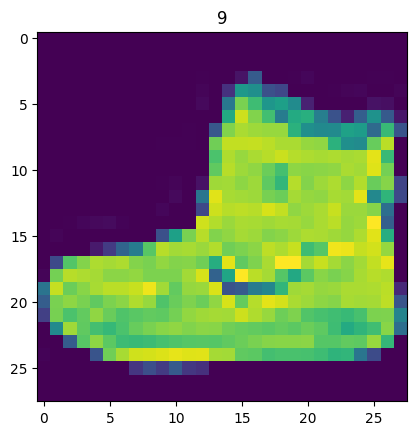

In [9]:
import matplotlib.pyplot  as plt
image , label = train_data[0]
print(f"imagen shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

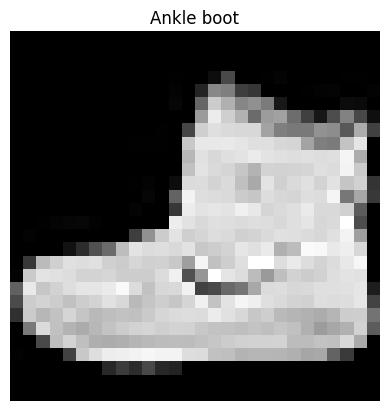

In [10]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

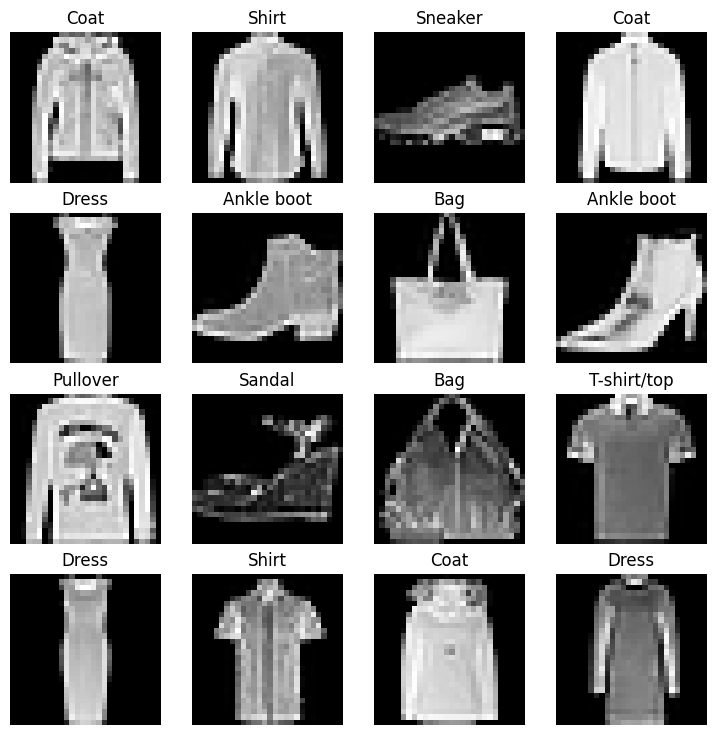

In [11]:
## plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0 , len(train_data) , size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze() , cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)
  #print(random_idx)

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non - linearties

In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2.Prepare Dataloader
Right now , our data is in the form of pytorch datasets.
dataloader turns our dataset into a python iterable.
more specifically , we want to our data into batches(mini - bathes).

why would we do this?
1. It is more computationally efficient , as in, your computing hardware may not be able to look(store in m/y) at 60000 images in one hit , so we break it down to 32 images at a time(batch size of 32 )
2. it gives our neural network more chances to update it's gradients per epoch

In [13]:
from torch.utils.data import DataLoader

#setup the batch size Hyperparameter
BATCH_SIZE = 32

# Turn Datasets into iterbales (batches)
train_dataloader = DataLoader(dataset = train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7887ade3f850>,
 <torch.utils.data.dataloader.DataLoader at 0x7887ade99210>)

In [14]:
# lets check out what we've created
print(f"DataLoader:{train_dataloader ,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} bathces of {BATCH_SIZE}....")
print(f"Length of test_dataloader:{len(test_dataloader)} bathces of {BATCH_SIZE}....")

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7887ade3f850>, <torch.utils.data.dataloader.DataLoader object at 0x7887ade99210>)
Length of train_dataloader:1875 bathces of 32....
Length of test_dataloader:313 bathces of 32....


In [15]:
#check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:7 , label size:torch.Size([])


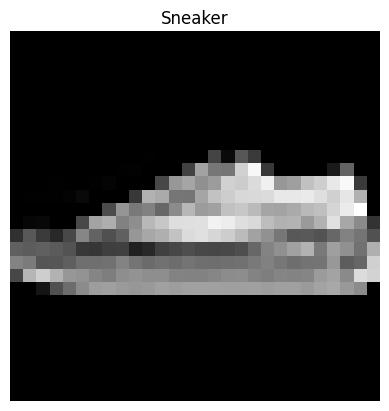

In [16]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0 , len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label} , label size:{label.shape}")

## 3. Model 0: Build a Baseline Model

when starting to build a series od machine learning modelling experiments,it's best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: Start simply and add Complexity when necessary

In [17]:
#create a  Flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#Flatten the shape
output = flatten_model(x) # Perform forward pass

#print out what happened
print(f"Shape before flattening :{x.shape} ->[color_channels , height , width]")
print(f"Shape after Flattening :{output.shape} ->[color_chanenls , height*width]")

Shape before flattening :torch.Size([1, 28, 28]) ->[color_channels , height , width]
Shape after Flattening :torch.Size([1, 784]) ->[color_chanenls , height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self , x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 =FashionMNISTModelV0(
    input_shape = 784,
    hidden_units= 10,
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 Setup a loss,optimizer and Evaluation Metrics

* Loss Function - since we're working with multi class data , our loss fucntion wil be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metric - since we're working on a classification problem , let's use accuracy as our evalution metric

In [22]:
import requests
from pathlib import Path

#Download some helper fucntions from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)


In [23]:
 # Import accuaracy metric
 from helper_functions import accuracy_fn

 # Setup loss function and optimizer
 loss_fn = nn.CrossEntropyLoss()
 optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.1)

### 3.2 creating a function to time our experiments

Machine learning is very experimental
Two of the main things you'll often want to track are:
1. Model's Performace(loss and acuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """Prints differnce between start and end time."""
  total_time = end - start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [25]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start = start_time , end = end_time ,device='cpu' )

Train time on cpu:0.000 seconds


5.463099995495213e-05

### 3.3 creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches ,perform training steps,calculate the train loss per batch
3. Loop through testing batches , perform testing steps,calculate the test loss per batch
4. print out what's happening
5. time it all.


In [26]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the no of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n--------")
  ### training
  train_loss = 0
  # add a loop to loop through the traning batches
  for batch,(x,y) in enumerate (train_dataloader):
    model_0.train()
    #1.Forward pass
    y_pred = model_0(x)

    # 2.Calculate loss (per batch)
    loss = loss_fn(y_pred , y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer steo
    optimizer.step()

  # print out what's happening
    if batch % 400 == 0:
        print(f"Looked at{batch * len(x)}/{len(train_dataloader.dataset)} samples.")
  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### testing
  test_loss , test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for x_test , y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(x_test)

      #2. calculate loss
      test_acc += loss_fn(test_pred , y_test)

      # 3. calculate accuracy
      test_acc += accuracy_fn(y_true = y_test , y_pred = test_pred.argmax(dim = 1))
    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happning
  print(f"\n Train loss :{train_loss:.4f} | Test Loss:{test_loss:.4f} , Test acc:{test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.5904 | Test Loss:0.0000 , Test acc:82.5483
Epoch:1
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.4763 | Test Loss:0.0000 , Test acc:83.6768
Epoch:2
--------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss :0.4550 | Test Loss:0.0000 , Test acc:83.9032
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
     

In [27]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and get Model 0 Results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for x, y in data_loader:
            # Make predictions with the model
            y_pred = model(x)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [29]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device ): # Add device argument
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (torch.device): The device to run the model on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval() # put model in eval mode
    with torch.inference_mode():
        for x, y in tqdm(data_loader):
            # Send data to device
            x, y = x.to(device), y.to(device) # Move data to the same device as the model

            # Make predictions with the model
            y_pred = model(x)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

## 5. Setup a task agnostic code

In [30]:
!nvidia-smi

Fri May  9 16:11:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [31]:
torch.cuda.is_available()

True

In [32]:
# setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

  ## Model 1 : Building a better model with non-Linearity
  

In [33]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [34]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

## 6. Setup Loss , optimizer and Evalation metrics

In [35]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## 6.2 Functionzing training and evalution/testing loops

Let's create a functio for:
* Training loop - `train_step()`
* testing loop - `test_step()`

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (x, y) in enumerate(data_loader):
        # Send data to GPU
        x, y = x.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(x)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for x, y in data_loader:
            # Send data to GPU
            x, y = x.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(x)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for x, y in data_loader:
            # Send data to GPU
            x, y = x.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(x)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [38]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda:27.582 seconds


> **Note:** Sometimes , depending on your data/hardware you might find that your model trains faster on CPU than GPU.

> Why is this?
>
> 1. It could be that overhead for copying data /model to from the Gpu overweights the compute benefita offered by the GPU.
> 2. The hardware you're using has a better cpu in terms compute  capability than the GPU

In [39]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1.to(device),
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2 : Building a Convolutional Neural Network(CNN)

CNN's are also known as ConvNets
CNN's are known for their capabilities to find patterns in visual data.


In [40]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [41]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [42]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [43]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [44]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [45]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [46]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [47]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [48]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [49]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through `nn.Conv2d`


In [50]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [51]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [52]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

In [53]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [54]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59673 | Train accuracy: 78.31%
Test loss: 0.39949 | Test accuracy: 85.80%

Epoch: 1
---------
Train loss: 0.36447 | Train accuracy: 86.87%
Test loss: 0.35428 | Test accuracy: 86.98%

Epoch: 2
---------
Train loss: 0.32447 | Train accuracy: 88.20%
Test loss: 0.32212 | Test accuracy: 88.13%

Train time on cuda:34.706 seconds


In [55]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32212236523628235,
 'model_acc': 88.12899361022365}

In [56]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

## 7.2 Stepping through `nn.MaxPool2d()`

In [57]:
image.shape

torch.Size([1, 28, 28])

In [58]:
test_image.shape

torch.Size([3, 64, 64])

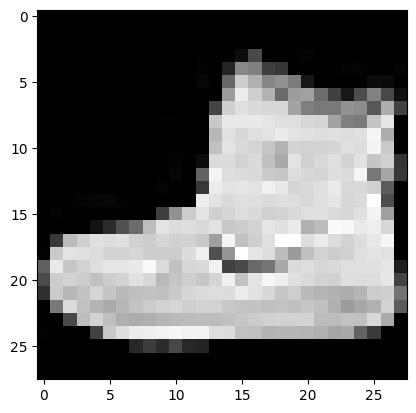

In [59]:
plt.imshow(image.squeeze(),cmap='gray')

In [60]:
#  Print out original image shape without unsqueezed dimension
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after goinh through conv_layer():{test_image_through_conv}")
# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through comv_layer() and  max_pool_layer():{test_image_through_conv_and_max_pool.shape}")

Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Shape after goinh through conv_layer():tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.

In [61]:
torch.manual_seed(42)

## 7.3 Setting up the Loss Function and OPtimizer for `Model2`

In [62]:
# setup loss function and/ eval metrics /optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimzer = torch.optim.SGD(params = model_2.parameters(),
                           lr=0.1)

In [63]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 3.4444e-01,  3.5753e-01, -4.7440e-01],
                        [ 2.1796e-01,  1.5047e-01, -2.8592e-02],
                        [-3.2171e-01,  1.5145e-01,  3.3239e-01]]],
              
              
                      [[[-4.2909e-01,  4.9282e-01, -4.5073e-02],
                        [ 2.0144e-01,  4.5093e-01,  1.7459e-01],
                        [-1.2494e-01,  4.0782e-01,  1.3900e-01]]],
              
              
                      [[[-3.3725e-01, -6.7932e-02,  1.8084e-02],
                        [-6.5479e-01, -6.4235e-01,  1.5813e-01],
                        [-8.0511e-01, -6.7244e-01, -1.6367e-01]]],
              
              
                      [[[-7.3051e-01, -9.3218e-01, -8.0429e-01],
                        [ 3.2240e-01, -5.3622e-01,  1.6683e-01],
                        [ 2.4209e-01, -2.8727e-02,  3.7556e-01]]],
              
              
                      [[[-5.9918e-02,  3.7616e-01, -2.1731

### 7.4 Training and Testing `Model_2` using our training and testing functions

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and Test Model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f" Epoch:{epoch}\n-------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

 Epoch:0
-------
Train loss: 0.30570 | Train accuracy: 88.84%
Test loss: 0.33144 | Test accuracy: 87.79%

 Epoch:1
-------
Train loss: 0.29120 | Train accuracy: 89.45%
Test loss: 0.32801 | Test accuracy: 88.15%

 Epoch:2
-------
Train loss: 0.28233 | Train accuracy: 89.86%
Test loss: 0.30733 | Test accuracy: 89.02%

Train time on cuda:33.936 seconds


In [65]:
!nvidia-smi

Fri May  9 16:12:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P0             30W /   70W |     166MiB /  15360MiB |     11%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [66]:
# get model_2 results
model_2_results = eval_model(
    model= model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30733323097229004,
 'model_acc': 89.01757188498402}

In [67]:
## Compare model results and training time across models
import pandas as pd
compare_res = pd.DataFrame([model_0_results,
                            model_1_results,
                            model_2_results])
compare_res

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.307333,89.017572


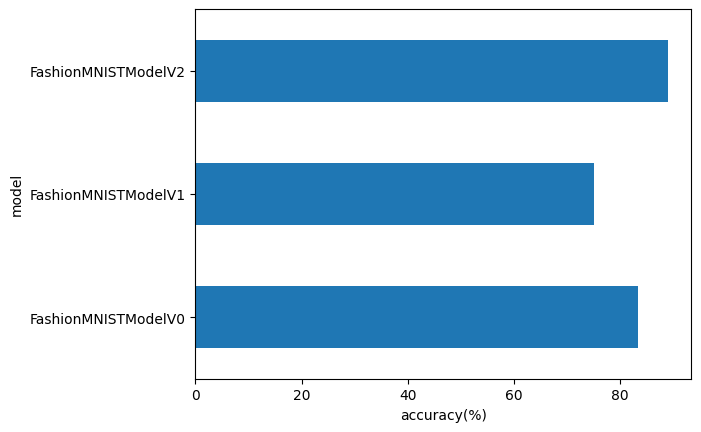

In [68]:
## Visulaize our model results

compare_res.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

## 9. Make and Evaluate random predictions with best model

In [69]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample(add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample , dim =0).to(device)
      # forward pass
      pred_logit = model(sample)
      # get predcition probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze()  ,dim=0)
      # get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [70]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in  random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
  # view the 1st sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

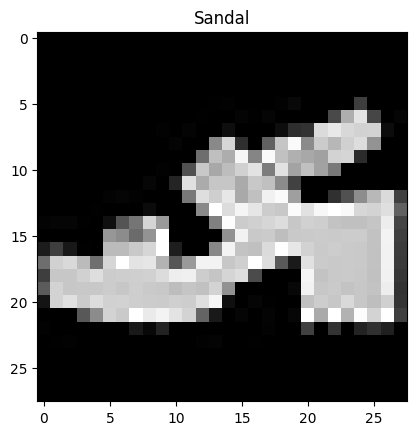

In [71]:

plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [72]:
## make predictions
pred_probs = make_predictions(model= model_2,
                             data = test_samples)
# view 1st prediction probablities
pred_probs[:2]

tensor([[8.4043e-09, 6.9832e-10, 3.4031e-09, 1.4944e-09, 3.1447e-09, 9.9975e-01,
         1.5941e-08, 1.6488e-06, 6.3416e-06, 2.4081e-04],
        [3.5517e-03, 9.5645e-01, 9.8875e-05, 4.6499e-03, 2.8566e-02, 4.9206e-06,
         6.5042e-03, 1.2695e-04, 1.6196e-05, 2.7633e-05]])

In [73]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [74]:
## Convert predictions probablities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [75]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

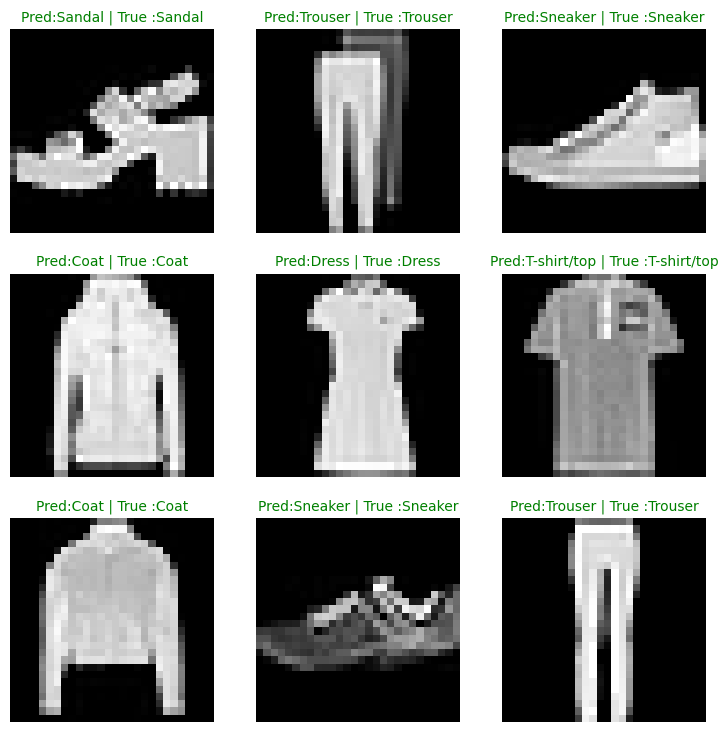

In [76]:
# plot predictions
import random
torch.manual_seed(42)
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate (test_samples):
  # Create Subplot
  plt.subplot(nrows,ncols , i+1)

  #plt the target image
  plt.imshow(sample.squeeze(),cmap='gray')
  # Find the predictions (in text form ,e.g "sandal")
  pred_label = class_names[pred_classes[i]]
  # Get the Truth table
  true_table = class_names[test_labels[i]]
  # create a title for the plot
  title_text = f"Pred:{pred_label} | True :{true_table}"

  # check the equality pred and truth and change color of the title
  if pred_label == true_table:
    plt.title(title_text , fontsize=10 , c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False);

## 10. Making a Confsion matrix for further prediction evaluation

A Confusion Matrix is a fantastic way of evaluating your classifiation models
visulally

1. make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()`

In [77]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader, desc="making predictions..."):
    x,y = x.to(device) , y.to(device)
    y_logit = model_2(x)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [78]:
len(y_pred_tensor)

10000

In [79]:
## See i frequired a package are installed and if not , install them..
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split("."))[1]>=19,"mlxtend version"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend verision:{mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00
mlxtend verision:0.23.4


In [80]:
import mlxtend

In [81]:
mlxtend.__version__

'0.23.4'

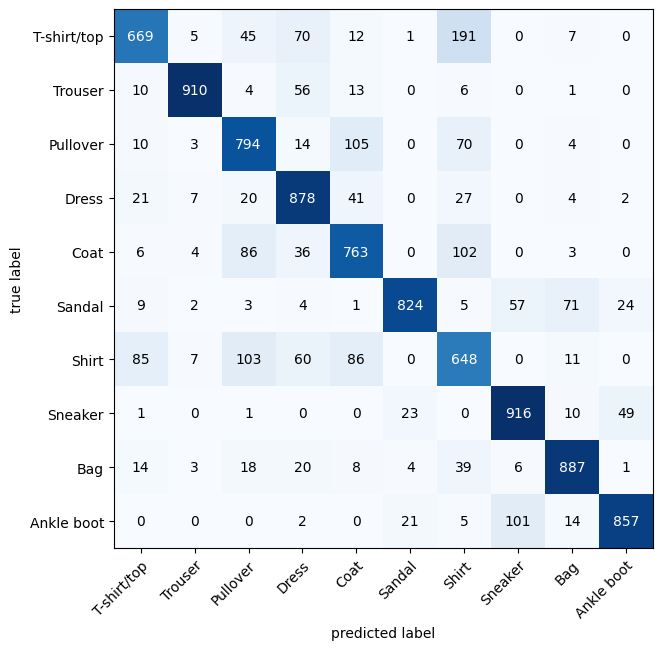

In [82]:
# Import necessary libraries
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup Confusion instance and compare predictions to targets
# Include the 'task' argument, set to 'multiclass' for this case
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
# 3. Plot a confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

In [83]:
confmat_tensor

tensor([[669,   5,  45,  70,  12,   1, 191,   0,   7,   0],
        [ 10, 910,   4,  56,  13,   0,   6,   0,   1,   0],
        [ 10,   3, 794,  14, 105,   0,  70,   0,   4,   0],
        [ 21,   7,  20, 878,  41,   0,  27,   0,   4,   2],
        [  6,   4,  86,  36, 763,   0, 102,   0,   3,   0],
        [  9,   2,   3,   4,   1, 824,   5,  57,  71,  24],
        [ 85,   7, 103,  60,  86,   0, 648,   0,  11,   0],
        [  1,   0,   1,   0,   0,  23,   0, 916,  10,  49],
        [ 14,   3,  18,  20,   8,   4,  39,   6, 887,   1],
        [  0,   0,   0,   2,   0,  21,   5, 101,  14, 857]])

### 11. Save and load best performing Model


In [84]:
from pathlib import Path
# create model directory path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create Model Save
MODEL_NAME = "Pytorch_Computer_Vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the Model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
# The 'f' argument is added to specify the file path for saving.
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to:Models/Pytorch_Computer_Vision_model_2.pth


In [85]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.4095,  0.3383, -0.5234],
                        [ 0.1393,  0.2297, -0.1853],
                        [-0.3079,  0.1706,  0.4110]]],
              
              
                      [[[-0.4940,  0.4779, -0.0122],
                        [ 0.1314,  0.4609,  0.1819],
                        [-0.1061,  0.3982,  0.0465]]],
              
              
                      [[[-0.4513, -0.0608,  0.0712],
                        [-1.0350, -0.8551,  0.2171],
                        [-1.0909, -0.9929, -0.1036]]],
              
              
                      [[[-0.8586, -1.3526, -0.8775],
                        [ 0.3681, -0.6787,  0.2557],
                        [ 0.2672, -0.0826,  0.4304]]],
              
              
                      [[[-0.0543,  0.2333, -0.1694],
                        [-0.2621,  0.1858, -0.2728],
                        [-0.0613,  0.3008, -0.0423]]],
              
              
           

In [86]:
# Create a  New Instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
# load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the Model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [87]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30733323097229004,
 'model_acc': 89.01757188498402}

In [88]:
# Evulate our model

torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30733323097229004,
 'model_acc': 89.01757188498402}

#### 1. Federated Learning

In [89]:
import os
import random
import json
import pickle
import argparse
import yaml
from json import JSONEncoder
from tqdm import tqdm

In [90]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from torch.utils.data import Subset, DataLoader
import os
import PIL


def load_data(name, root='./data', download=True, save_pre_data=True):

    data_dict = ['MNIST', 'EMNIST', 'FashionMNIST', 'CelebA', 'CIFAR10', 'QMNIST', 'SVHN', "IMAGENET", 'CIFAR100']
    assert name in data_dict, "The dataset is not present"

    if not os.path.exists(root):
        os.makedirs(root, exist_ok=True)

    if name == 'MNIST':
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.MNIST(root=root, train=True, download=download, transform=transform)
        testset = torchvision.datasets.MNIST(root=root, train=False, download=download, transform=transform)

    elif name == 'EMNIST':
        # byclass, bymerge, balanced, letters, digits, mnist
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.EMNIST(root=root, train=True, split= 'letters', download=download, transform=transform)
        testset = torchvision.datasets.EMNIST(root=root, train=False, split= 'letters', download=download, transform=transform)

    elif name == 'FashionMNIST':
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
        trainset = torchvision.datasets.FashionMNIST(root=root, train=True, download=download, transform=transform)
        testset = torchvision.datasets.FashionMNIST(root=root, train=False, download=download, transform=transform)

    elif name == 'CelebA':
        # Could not loaded possibly for google drive break downs, try again at week days
        target_transform = transforms.Compose([transforms.ToTensor()])
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        trainset = torchvision.datasets.CelebA(root=root, split='train', target_type=list, download=download, transform=transform, target_transform=target_transform)
        testset = torchvision.datasets.CelebA(root=root, split='test', target_type=list, download=download, transform=transform, target_transform=target_transform)

    elif name == 'CIFAR10':
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])])
        trainset = torchvision.datasets.CIFAR10(root=root, train=True, download=download, transform=transform)
        testset = torchvision.datasets.CIFAR10(root=root, train=False, download=download, transform=transform)
        trainset.targets = torch.Tensor(trainset.targets)
        testset.targets = torch.Tensor(testset.targets)

    elif name == 'CIFAR100':
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
        trainset = torchvision.datasets.CIFAR100(root=root, train=True, transform=transform, download=True)
        testset = torchvision.datasets.CIFAR100(root=root, train=False, transform=transform, download=True)
        trainset.targets = torch.Tensor(trainset.targets)
        testset.targets = torch.Tensor(testset.targets)

    elif name == 'QMNIST':
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.QMNIST(root=root, what='train', compat=True, download=download, transform=transform)
        testset = torchvision.datasets.QMNIST(root=root, what='test', compat=True, download=download, transform=transform)

    elif name == 'SVHN':
        transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
        trainset = torchvision.datasets.SVHN(root=root, split='train', download=download, transform=transform)
        testset = torchvision.datasets.SVHN(root=root, split='test', download=download, transform=transform)
        trainset.targets = torch.Tensor(trainset.labels)
        testset.targets = torch.Tensor(testset.labels)

    elif name == 'IMAGENET':
        train_val_transform = transforms.Compose([
            transforms.ColorJitter(hue=.05, saturation=.05),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
            transforms.ToTensor(),
        ])
        test_transform = transforms.Compose([
            transforms.ColorJitter(hue=.05, saturation=.05),
            transforms.ToTensor(),
        ])
        # transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
        #                          std=[0.229, 0.224, 0.225])])
        trainset = torchvision.datasets.ImageFolder(root='./data/tiny-imagenet-200/train', transform=train_val_transform)
        testset = torchvision.datasets.ImageFolder(root='./data/tiny-imagenet-200/val', transform=test_transform)
        trainset.targets = torch.Tensor(trainset.targets)
        testset.targets = torch.Tensor(testset.targets)

    len_classes_dict = {
        'MNIST': 10,
        'EMNIST': 26, # ByClass: 62. ByMerge: 814,255 47.Digits: 280,000 10.Letters: 145,600 26.MNIST: 70,000 10.
        'FashionMNIST': 10,
        'CelebA': 0,
        'CIFAR10': 10,
        'QMNIST': 10,
        'SVHN': 10,
        'IMAGENET': 200,
        'CIFAR100': 100
    }

    len_classes = len_classes_dict[name]

    return trainset, testset, len_classes


def divide_data(num_client=1, num_local_class=10, dataset_name='emnist', i_seed=0):

    torch.manual_seed(i_seed)

    trainset, testset, len_classes = load_data(dataset_name, download=True, save_pre_data=False)

    num_classes = len_classes
    if num_local_class == -1:
        num_local_class = num_classes
    assert 0 < num_local_class <= num_classes, "number of local class should smaller than global number of class"

    trainset_config = {'users': [],
                       'user_data': {},
                       'num_samples': []}
    config_division = {}  # Count of the classes for division
    config_class = {}  # Configuration of class distribution in clients
    config_data = {}  # Configuration of data indexes for each class : Config_data[cls] = [0, []] | pointer and indexes

    for i in range(num_client):
        config_class['f_{0:05d}'.format(i)] = []
        for j in range(num_local_class):
            cls = (i+j) % num_classes
            if cls not in config_division:
                config_division[cls] = 1
                config_data[cls] = [0, []]

            else:
                config_division[cls] += 1
            config_class['f_{0:05d}'.format(i)].append(cls)

    # print(config_class)
    # print(config_division)

    for cls in config_division.keys():
        indexes = torch.nonzero(trainset.targets == cls)
        num_datapoint = indexes.shape[0]
        indexes = indexes[torch.randperm(num_datapoint)]
        num_partition = num_datapoint // config_division[cls]
        for i_partition in range(config_division[cls]):
            if i_partition == config_division[cls] - 1:
                config_data[cls][1].append(indexes[i_partition * num_partition:])
            else:
                config_data[cls][1].append(indexes[i_partition * num_partition: (i_partition + 1) * num_partition])

    for user in tqdm(config_class.keys()):
        user_data_indexes = torch.tensor([])
        for cls in config_class[user]:
            user_data_index = config_data[cls][1][config_data[cls][0]]
            user_data_indexes = torch.cat((user_data_indexes, user_data_index))
            config_data[cls][0] += 1
        user_data_indexes = user_data_indexes.squeeze().int().tolist()
        user_data = Subset(trainset, user_data_indexes)
        #user_targets = trainset.target[user_data_indexes.tolist()]
        trainset_config['users'].append(user)
        trainset_config['user_data'][user] = user_data
        trainset_config['num_samples'] = len(user_data)

    #
    # test_loader = DataLoader(trainset_config['user_data']['f_00001'])
    # for i, (x,y) in enumerate(test_loader):
    #     print(i)
    #     print(y)


    return trainset_config, testset


if __name__ == "__main__":
    # 'MNIST', 'EMNIST', 'FashionMNIST', 'CelebA', 'CIFAR10', 'QMNIST', 'SVHN'
    data_dict = ['MNIST', 'EMNIST', 'FashionMNIST', 'CIFAR10', 'QMNIST', 'SVHN']

    for name in data_dict:
        print(name)
        divide_data(num_client=20, num_local_class=2, dataset_name=name, i_seed=0)

MNIST


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.55MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 136kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.18MB/s]
100%|██████████| 20/20 [00:00<00:00, 3917.53it/s]


EMNIST


100%|██████████| 562M/562M [00:11<00:00, 49.1MB/s]
100%|██████████| 20/20 [00:00<00:00, 4078.48it/s]


FashionMNIST


100%|██████████| 20/20 [00:00<00:00, 3620.93it/s]


CIFAR10


100%|██████████| 170M/170M [00:18<00:00, 9.10MB/s]
100%|██████████| 20/20 [00:00<00:00, 4070.56it/s]


QMNIST


100%|██████████| 9.70M/9.70M [00:00<00:00, 373MB/s]
100%|██████████| 463k/463k [00:00<00:00, 95.9MB/s]
100%|██████████| 9.74M/9.74M [00:00<00:00, 279MB/s]
100%|██████████| 527k/527k [00:00<00:00, 63.2MB/s]
100%|██████████| 20/20 [00:00<00:00, 30.94it/s]


SVHN


100%|██████████| 182M/182M [00:19<00:00, 9.32MB/s]
100%|██████████| 64.3M/64.3M [00:12<00:00, 5.14MB/s]
100%|██████████| 20/20 [00:00<00:00, 4687.42it/s]
